# 主成分分析

In [111]:
#ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#データの読み込み
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
feature_names=iris.feature_names

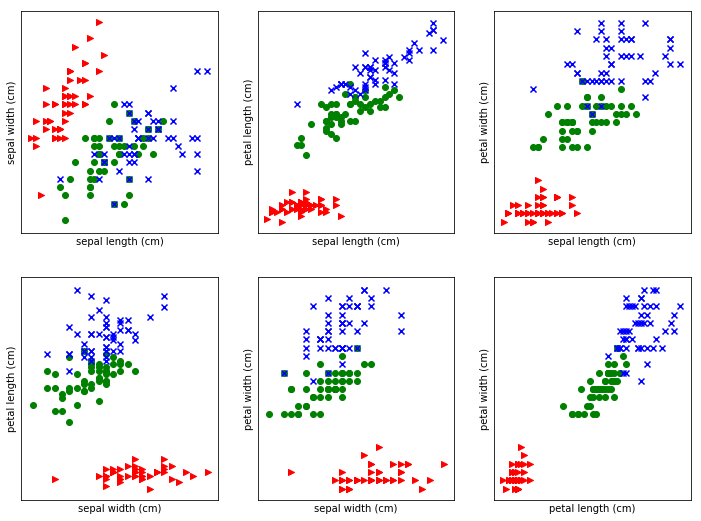

In [112]:
#4つの特徴量のうち2つを選んで2次元化するarray
pairs=[(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
#プロット
plt.figure(figsize=(12,9))
for i, (p0, p1) in enumerate(pairs):
    plt.subplot(2, 3, i + 1)
    for target, marker, color in zip(list(range(3)), ">ox", "rgb"):
        plt.scatter(X[iris.target == target, p0], 
                    X[iris.target == target, p1], 
                    marker=marker, c=color)
    plt.xlabel(feature_names[p0])
    plt.ylabel(feature_names[p1])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [114]:
#データの標準化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)

In [124]:
#主成分分析を実行
from sklearn.decomposition import PCA
pca=PCA()
X_pca=pca.fit_transform(X_std)

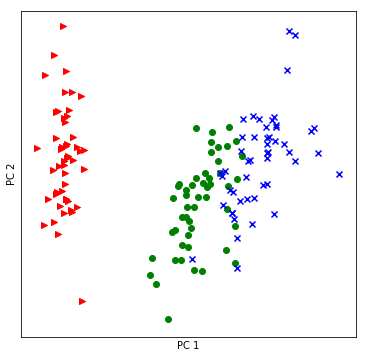

In [119]:
#第1主成分と第2主成分を取り出し、2次元にプロット
plt.figure(figsize=(6, 6))
for target, marker, color in zip(range(3), '>ox', 'rgb'):
    plt.scatter(X_pca[iris.target==target, 0], 
                X_pca[iris.target==target, 1], 
                marker=marker, color=color)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xticks([])
plt.yticks([])
plt.show()

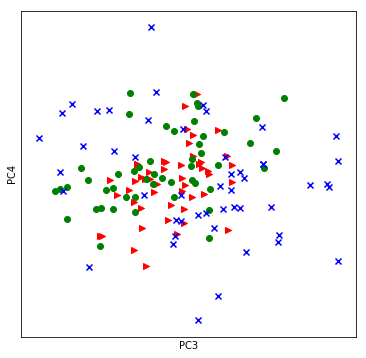

In [120]:
#第3主成分と第4主成分を取り出して、2次元にプロット
plt.figure(figsize=(6,6))
for target,marker,color in zip(range(3),">ox","rgb"):
    plt.scatter(X_pca[iris.target==target,2],
                X_pca[iris.target==target,3],
               marker=marker,color=color)
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.xticks([])
plt.yticks([])
plt.show()

In [121]:
#寄与率の出力
print("寄与率:%s"%pca.explained_variance_ratio_)
print("")
#累積負荷量を出力
print("累積寄与率:%s"%np.cumsum(pca.explained_variance_ratio_))
print("")
#主成分の係数hを出力
print("係数h:%s"%pca.components_)
print("")
#因子負荷量を出力
print("因子負荷量:{}".format(pca.components_*
            np.sqrt(pca.explained_variance_).reshape(-1,1)))

寄与率:[0.72770452 0.23030523 0.03683832 0.00515193]

累積寄与率:[0.72770452 0.95800975 0.99484807 1.        ]

係数h:[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]

因子負荷量:[[ 0.89421016 -0.45081822  0.99500666  0.96822861]
 [ 0.35854928  0.89132754  0.02031465  0.06299656]
 [-0.27770122  0.0932195   0.05426497  0.24411001]
 [-0.03773647  0.01787973  0.11539407 -0.07540887]]


In [122]:
#特徴選択の場合の精度の出力
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores1=cross_val_score(SVC(),X_std[:,[0,2]],y,cv=5)
#この場合、層化5分割交差検証になる#
scores1.mean()

0.9400000000000001

In [129]:
#特徴抽出の場合の精度の出力(第1と第2)
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores2=cross_val_score(SVC(),X_pca[:,[0,1]],y,cv=5)
scores2.mean()

0.9133333333333333

In [142]:
#第1と第3
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(SVC(), X_pca[:, [0,2]], y, cv=5)
scores2.mean()

0.96